In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv("C:/Users/ASUS/Downloads/Mall_Customers.csv")
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [3]:
# Check for null values
print(data.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [4]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Annual Income (k$)
54     12
78     12
60      6
48      6
63      6
       ..
101     2
113     2
120     2
126     2
137     2
Name: count, Length: 64, dtype: int64


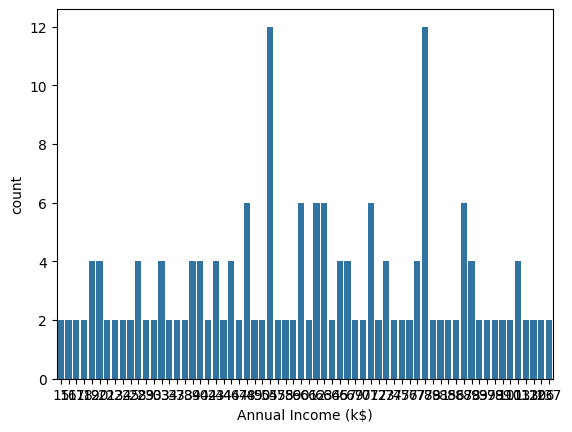

In [6]:
# Check for class imbalance
print(data['Annual Income (k$)'].value_counts()) 
# Visualize class distribution
sns.countplot(x='Annual Income (k$)', data=data)
plt.show()

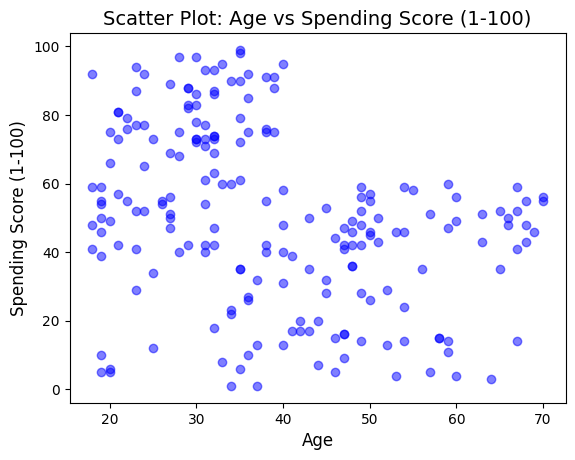

In [10]:
plt.scatter(data['Age'], data['Spending Score (1-100)'], color='blue', alpha=0.5)

# Add labels and title
plt.title("Scatter Plot: Age vs Spending Score (1-100)", fontsize=14)
plt.xlabel("Age", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

plt.show()


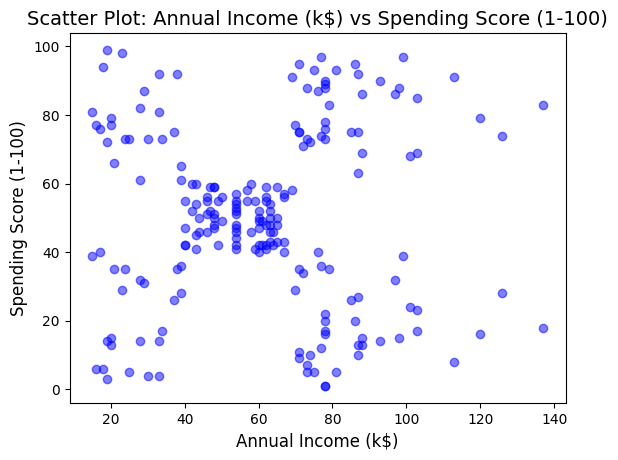

In [15]:
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], color='blue', alpha=0.5)

# Add labels and title
plt.title("Scatter Plot: Annual Income (k$) vs Spending Score (1-100)", fontsize=14)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)

plt.show()

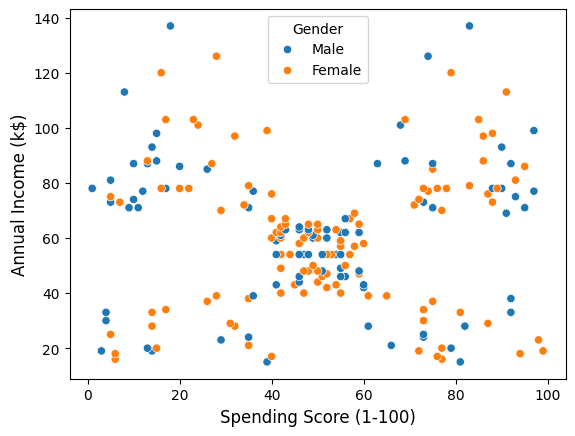

In [14]:
sns.scatterplot(x=data['Spending Score (1-100)'], y=data['Annual Income (k$)'], hue=data['Gender'])

# Add labels and title
#plt.title("Scatter Plot: Annual Income (k$) vs Spending Score (1-100)", fontsize=14)
plt.ylabel("Annual Income (k$)", fontsize=12)
plt.xlabel("Spending Score (1-100)", fontsize=12)

plt.show()


In [21]:
relevant_columns = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
customer_df = data[relevant_columns]
customer_df

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(customer_df)
scaled_data = scaler.transform(customer_df)
scaled_data

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992],
       [-1.20926872, -1.66266033,  1.00159627],
       [-0.27630176, -1.62449091, -1.71591298],
       [-1.13750203, -1.62449091,  1.70038436],
       [ 1.80493225, -1.58632148, -1.83237767],
       [-0.6351352 , -1.58632148,  0.84631002],
       [ 2.02023231, -1.58632148, -1.4053405 ],
       [-0.27630176, -1.58632148,  1.89449216],
       [ 1.37433211, -1.54815205, -1.36651894],
       [-1.06573534, -1.54815205,  1.04041783],
       [-0.13276838, -1.54815205, -1.44416206],
       [-1.20926872, -1.54815205,  1.11806095],
       [-0.27630176, -1.50998262, -0.59008772],
       [-1.3528021 , -1.50998262,  0.61338066],
       [ 0.94373197, -1.43364376, -0.82301709],
       [-0.27630176, -1.43364376,  1.8556706 ],
       [-0.27630176, -1.39547433, -0.590

In [25]:
def find_best_clusters(df, maximum_K):
    clusters_centers = []
    k_values = []
    for k in range(2, maximum_K):
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)

        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)

    return clusters_centers, k_values

#measure of how tightly grouped the data points are within their clusters using elbow method. The inertia decreases as the number of clusters increases, but at some point, adding more clusters gives diminishing returns

In [26]:
clusters_centers, k_values = find_best_clusters(scaled_data, 12)

In [27]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

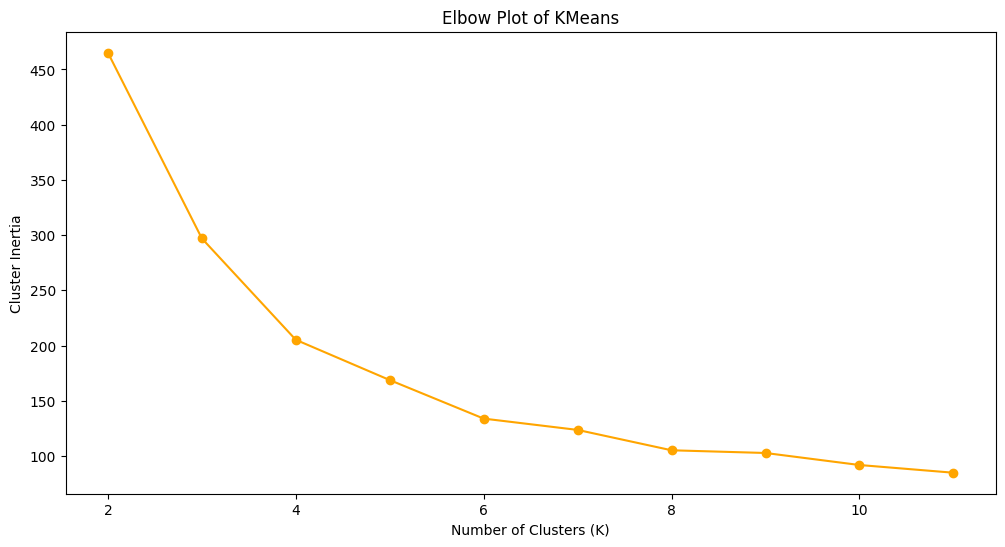

In [28]:
generate_elbow_plot(clusters_centers, k_values)

In [31]:
kmeans_model = KMeans(n_clusters = 5)
kmeans_model.fit(scaled_data)
data["clusters"] = kmeans_model.labels_
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,3
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,3
...,...,...,...,...,...,...
195,196,Female,35,120,79,0
196,197,Female,45,126,28,1
197,198,Male,32,126,74,0
198,199,Male,32,137,18,1


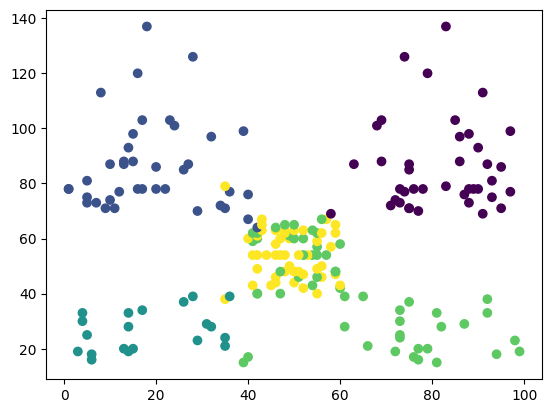

In [33]:
plt.scatter(data["Spending Score (1-100)"], 
            data["Annual Income (k$)"], 
            c = data["clusters"]
            )